## Import Data:

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

## Read Data:

### City Dataset:

In [2]:
#Read csv files and assign them to a variable
#Review with head function
city_data = pd.read_csv(r"C:\Users\arunp\Downloads\City.csv")
city_data.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [3]:
#Attribute Conversion
#Convert 'Population' to integer
city_data['Population'] = [str(x).replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

#Convert 'Users' to integer
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

In [4]:
#Check data type
city_data.dtypes

City           object
Population    float64
Users         float64
dtype: object

### Cab Dataset:

In [5]:
#Convert 'Date of Travel' datatype to datetime
cab_data = pd.read_csv(r"C:\Users\arunp\Downloads\Cab_Data.csv")
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit = 'D',origin = '1899-12-30')
cab_data.drop_duplicates(keep="first")
cab_data.dropna(how='all')
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
#Check data type
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

### Customer ID Dataset:

In [7]:
customer_ID = pd.read_csv(r"C:\Users\arunp\Downloads\Customer_ID.csv")
customer_ID.drop_duplicates(keep='first')
customer_ID.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
#check shape
customer_ID.shape

(49171, 4)

### Transaction ID Dataset:

In [9]:
transaction_ID = pd.read_csv(r"C:\Users\arunp\Downloads\Transaction_ID.csv")
transaction_ID.drop_duplicates(keep='first')
transaction_ID.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
transaction_ID.shape

(440098, 3)

In [11]:
# check the basic information 
print(cab_data.info())
print(customer_ID.info())
print(transaction_ID.info())
print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 4

## Merge and Create Dataset:

In [12]:
merged1=pd.merge(city_data, cab_data, on='City',how='outer')
merged2=pd.merge(customer_ID,transaction_ID,on='Customer ID', how='outer')
merged2.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [13]:
merged1.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048
3,NEW YORK NY,8405837.0,302149.0,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188
4,NEW YORK NY,8405837.0,302149.0,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460


In [14]:
#create a master dataset to work on, using four datasets to merge as one
masterdata = pd.merge(merged1,merged2,on='Transaction ID',how='outer')
masterdata.dropna
masterdata.head(3)

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2416.0,Male,28.0,21399.0,Cash
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,2060.0,Male,18.0,8149.0,Card
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,1451.0,Male,35.0,23989.0,Card


In [15]:
#Check shape
masterdata.shape

(440099, 14)

## Duplication Check:

In [16]:
#Check for duplications
duplicated_rows = masterdata[masterdata.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


## Outlier Detection:

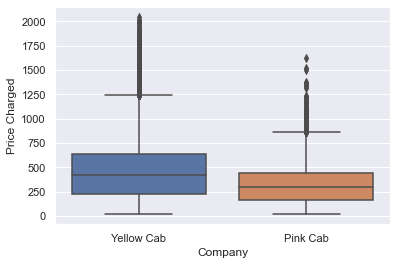

In [17]:
sns.set(style = 'darkgrid')

plt = sns.boxplot(x="Company", 
                 y="Price Charged",
                 data=masterdata,
                 order=["Yellow Cab", "Pink Cab"])


From outlier detection, price charged for the Yellow Cab is higher compared to Pink Cab

## Correlations:

In [18]:
#Check Correlation
masterdata.corr()

,Population,Users,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Population,1.000000,0.915488,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868
Users,0.915488,1.000000,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464
Transaction ID,0.023868,0.013526,1.000000,-0.001429,-0.052902,-0.003462,-0.021289,-0.001060,-0.000935
KM Travelled,-0.002311,-0.000428,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,0.326589,0.281061,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,0.015108,0.023628,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.647052,-0.610742,-0.021289,0.000389,-0.177324,0.003077,1.000000,-0.002161,-0.005834
Age,-0.009002,-0.005906,-0.001060,-0.000369,-0.003084,-0.000189,-0.002161,1.000000,-0.000573
Income (USD/Month),0.011868,0.010464,-0.000935,-0.000544,0.003228,-0.000633,-0.005834,-0.000573,1.000000


Text(0.5, 1.0, 'Correlation Heatmap Cab Investment Data", fontsize = 25')

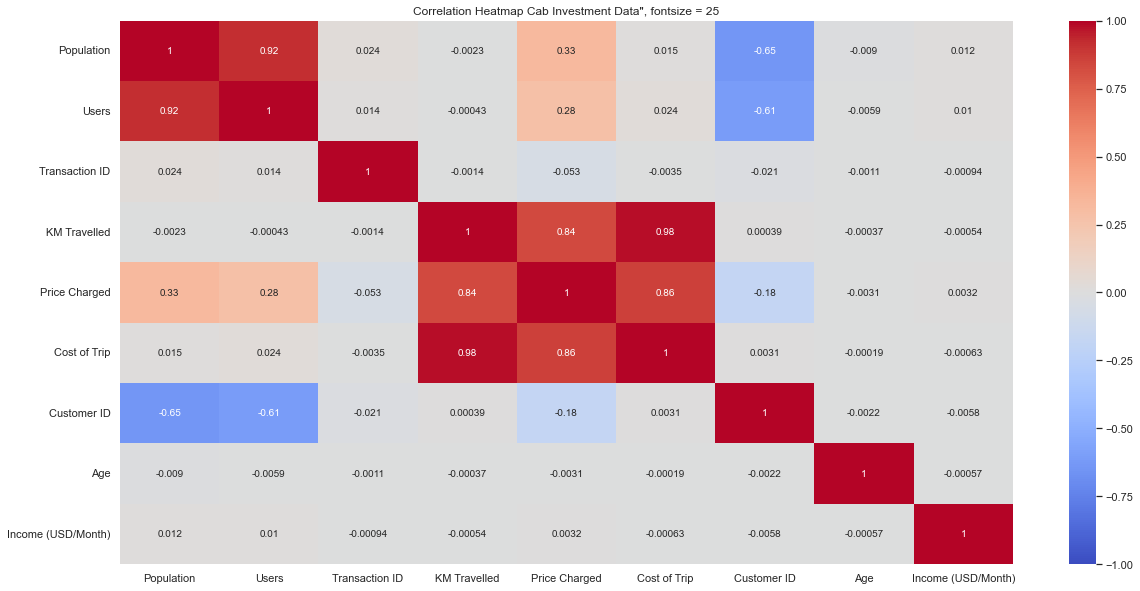

In [22]:
# Generate heatmap correlation
plt.figure(figsize=(20,10))
sns.heatmap(masterdata.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="coolwarm")
plt.title('Correlation Heatmap Cab Investment Data", fontsize = 25')

There is a strong correlation between Price Charged and Cost of Trip and KM Travelled

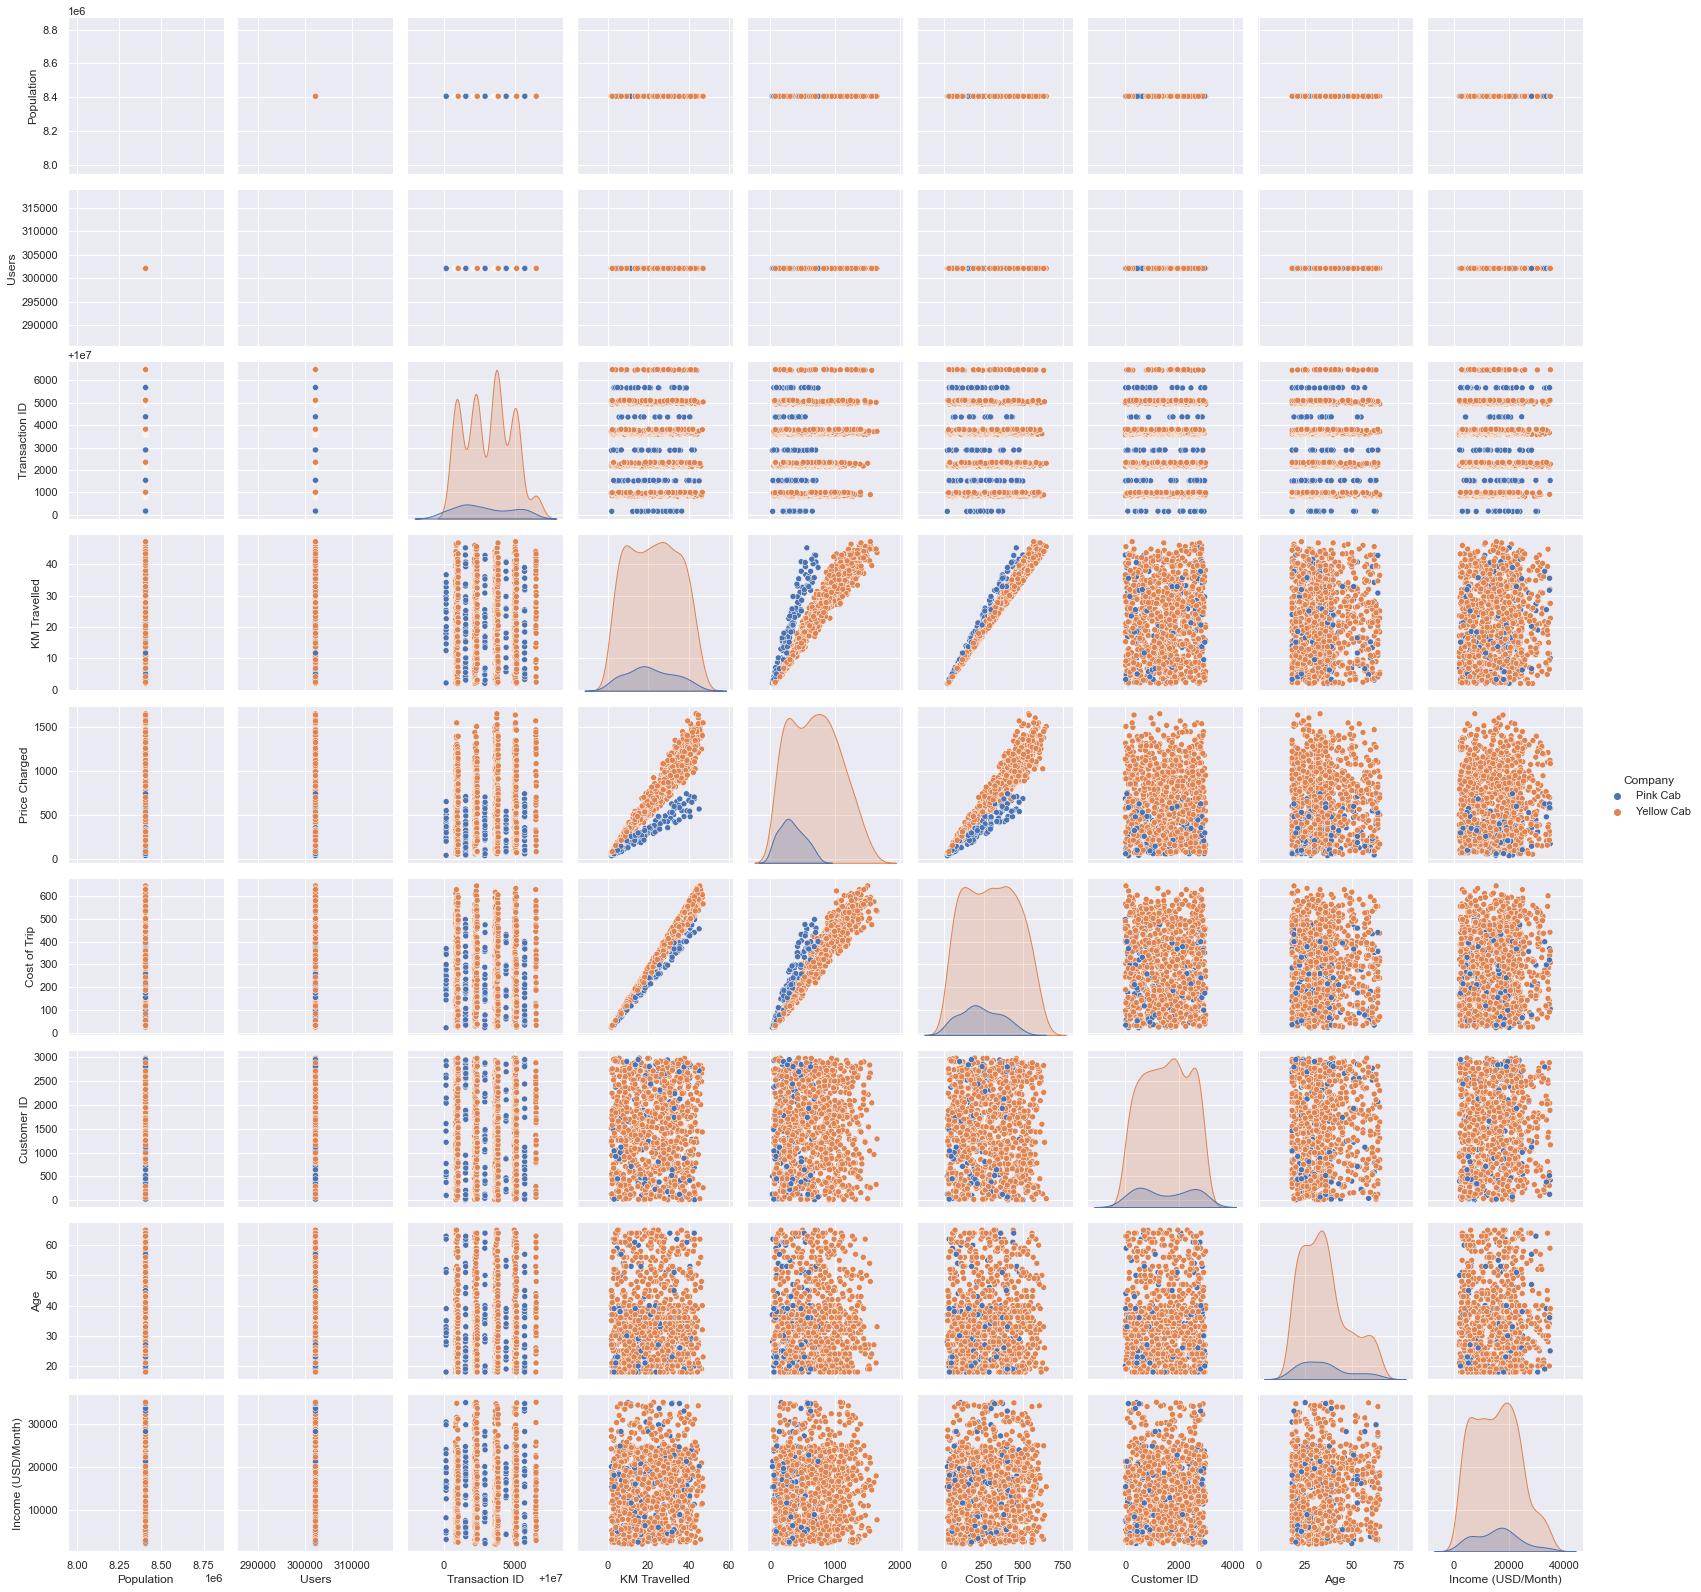

In [23]:
#Visualize Data
#Pairplot correlations
sns.pairplot(masterdata.head(1000), hue = 'Company')
plt.show()

Pair Plot shows us the distribution of single variables and relationships between two variables

## User Preference and Population:


<AxesSubplot:title={'center':'User Travel'}, ylabel='Users'>

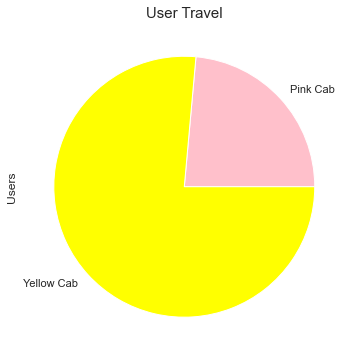

In [24]:
#Compare user travel for both companies
plt.figure(figsize = (12, 6))
piesum=masterdata.groupby(('Company'))
piesum=piesum.count()['Users']
plt.title('User Travel', fontsize = 15)
piesum.plot(kind="pie", colors = ["pink", "yellow"])

As we can see from the pie chart, users prefer the Yellow Cab over the Pink Cab.


<AxesSubplot:title={'center':'Total User Population Per Company'}, xlabel='User Population', ylabel='Company'>

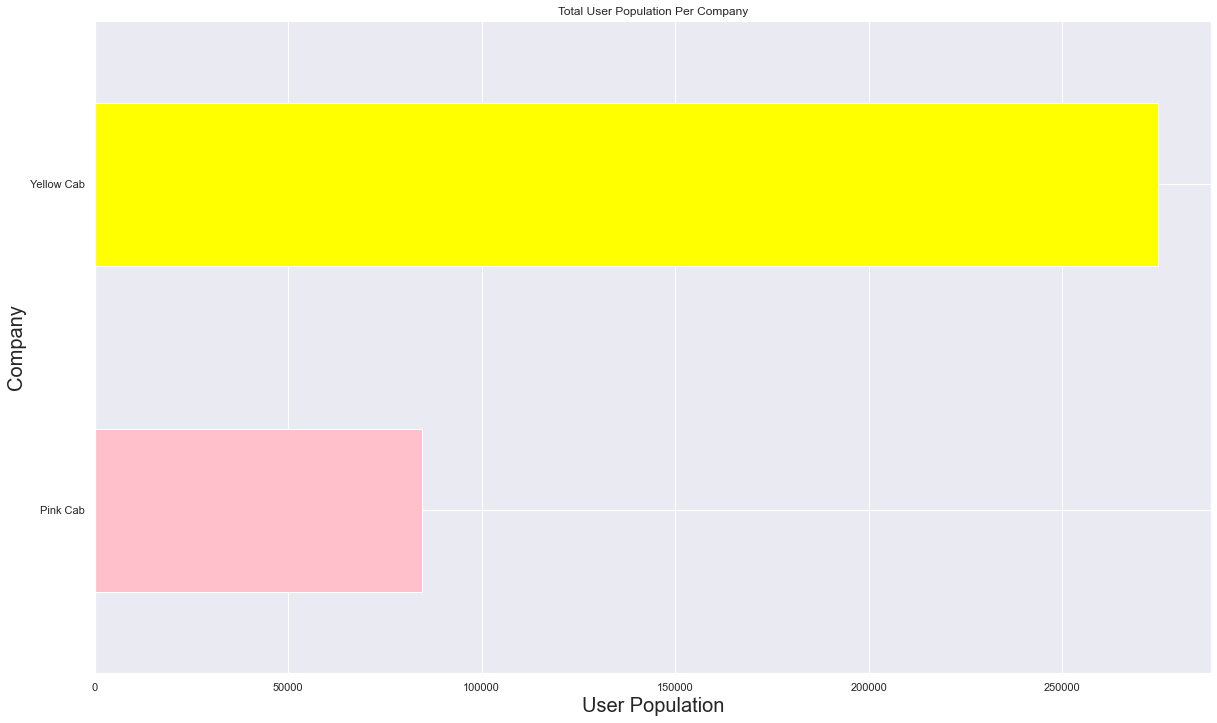

In [25]:
ax=masterdata.groupby(by=['Company']).count()['Population']
ax.to_frame()
plt.title('Total User Population Per Company')
plt.xlabel('User Population', fontsize=20)
plt.ylabel('Cab Companies', fontsize =20)
ax.plot(kind="barh",stacked=True, figsize=(20,12), color=("pink", "yellow"))

From the horizontal bar chart, user population is heavily leaning on the Yellow Cab as they have more customers, showing that the Yellow Cab dominates the market over the Pink Cab.


## KM Travelled Distribution:

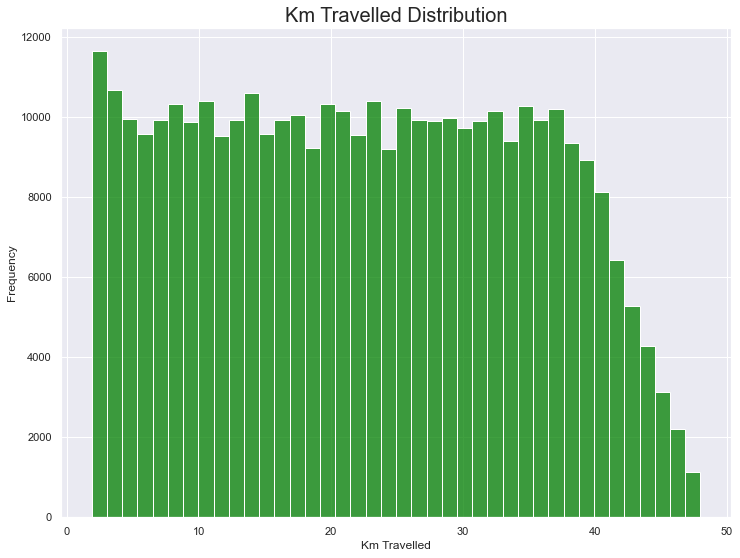

In [26]:
#KM Travelled Distribution
plt.figure(figsize=(12,9))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=40, color= 'green')
ax.set_title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

From the  graph, we can see that most of the rides are in the range of approximately 3 to 48 KM.

## User Payment Method:

Text(0.5, 1.0, 'Payment Methods For Both Companies')

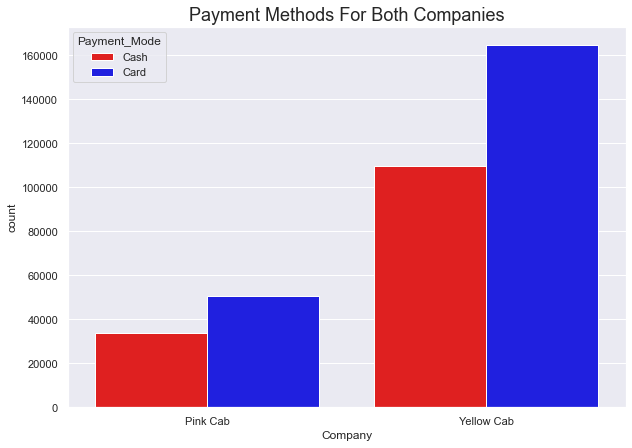

In [27]:
#Identify which payment method customers prefer to use, for each companyplt.figure(figsize = (16, 9))
plt.figure(figsize=(10,7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=masterdata, palette=['red',"blue"])
plt.title('Payment Methods For Both Companies', fontsize=18)

Cab Users for both companies prefer to pay with card instead of cash

## Gender:

<AxesSubplot:title={'center':'Cab Users by Gender'}, xlabel='Gender', ylabel='Frequency'>

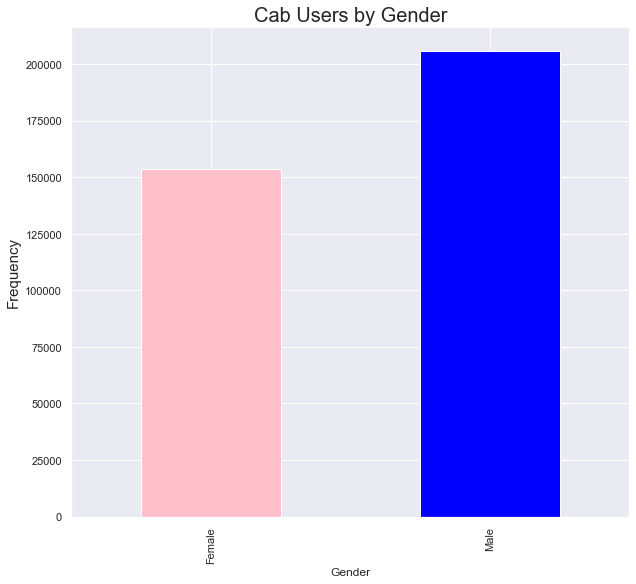

In [28]:
#Create bar graph to compare cab population by gender
plt.figure(figsize=(10,9))
ax =masterdata.groupby("Gender").count()['Users']
plt.title('Cab Users by Gender', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
ax.plot(kind="bar", color=["pink", "blue"])

More total male users for both companies.

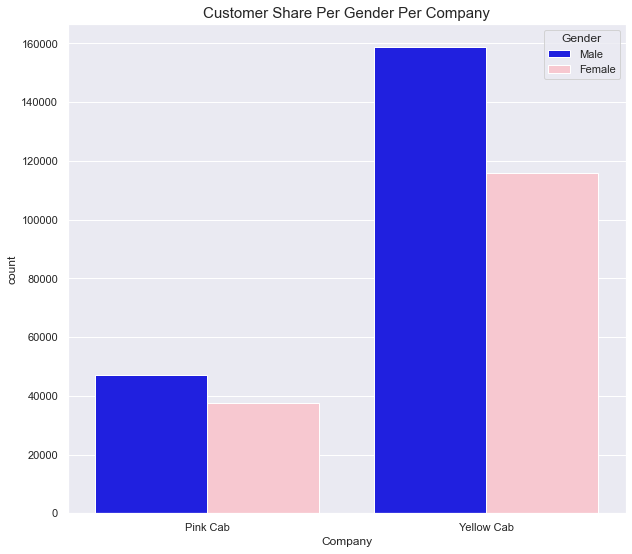

In [29]:
plt.figure(figsize=(10,9))
ax = sns.countplot(x="Company", hue="Gender", data=masterdata, palette=['blue',"pink"])
plt.title('Customer Share Per Gender Per Company', fontsize=15)
plt.show()

Both Male and Female users prefer to take the Yellow Cab over the Pink Cab.

## Users Per City:

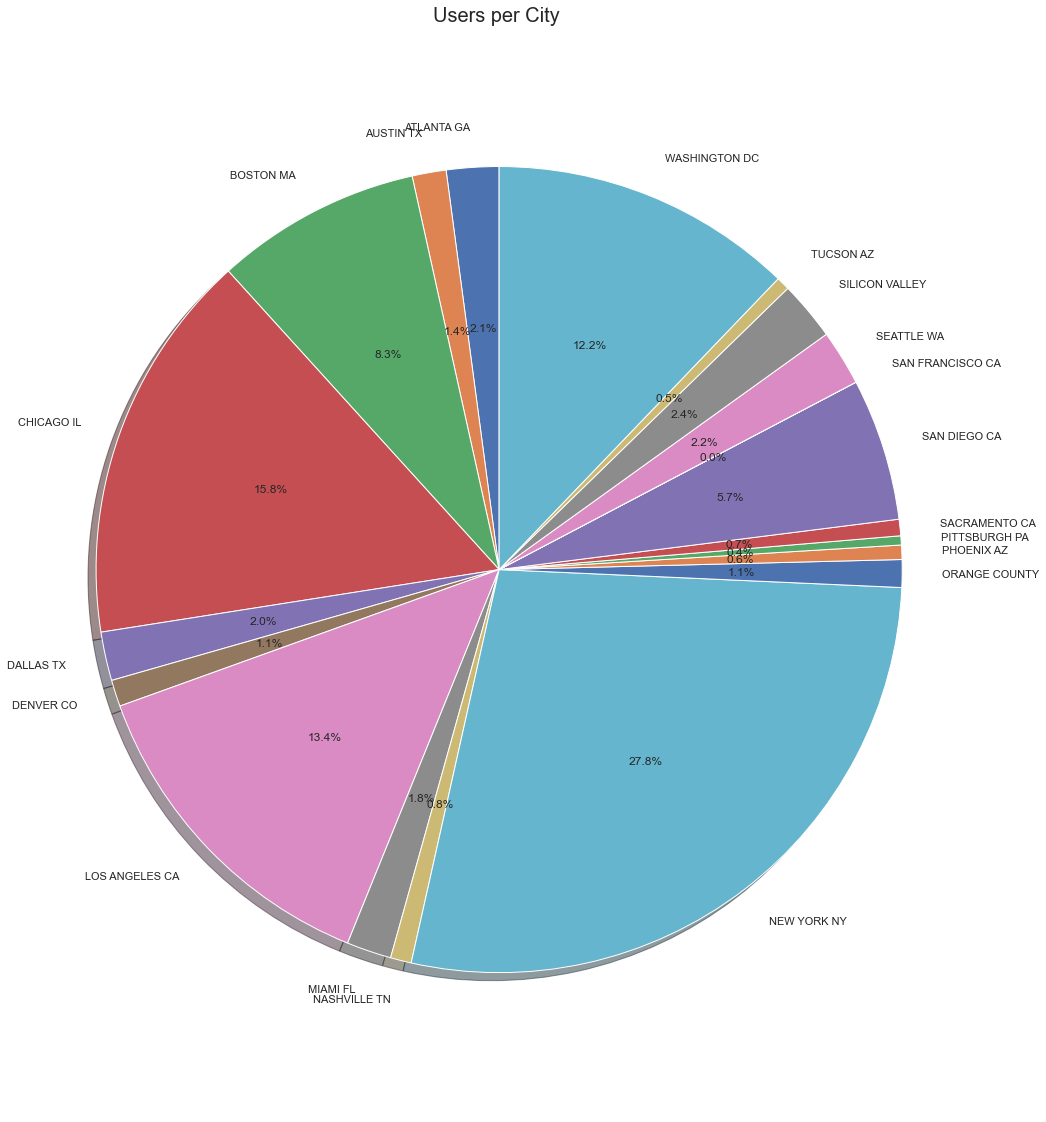

In [157]:
labs = city_users.index
vals = city_users.values

figp, axp = plt.subplots(figsize=(16,20))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90)
axp.axis('equal')
plt.title('Users per City', fontsize = 20)
plt.show()

New York City, Chicago and Los Angeles hold the bulk of the cab user population, followed by Washington DC and Boston.

<AxesSubplot:xlabel='City'>

<Figure size 720x648 with 0 Axes>

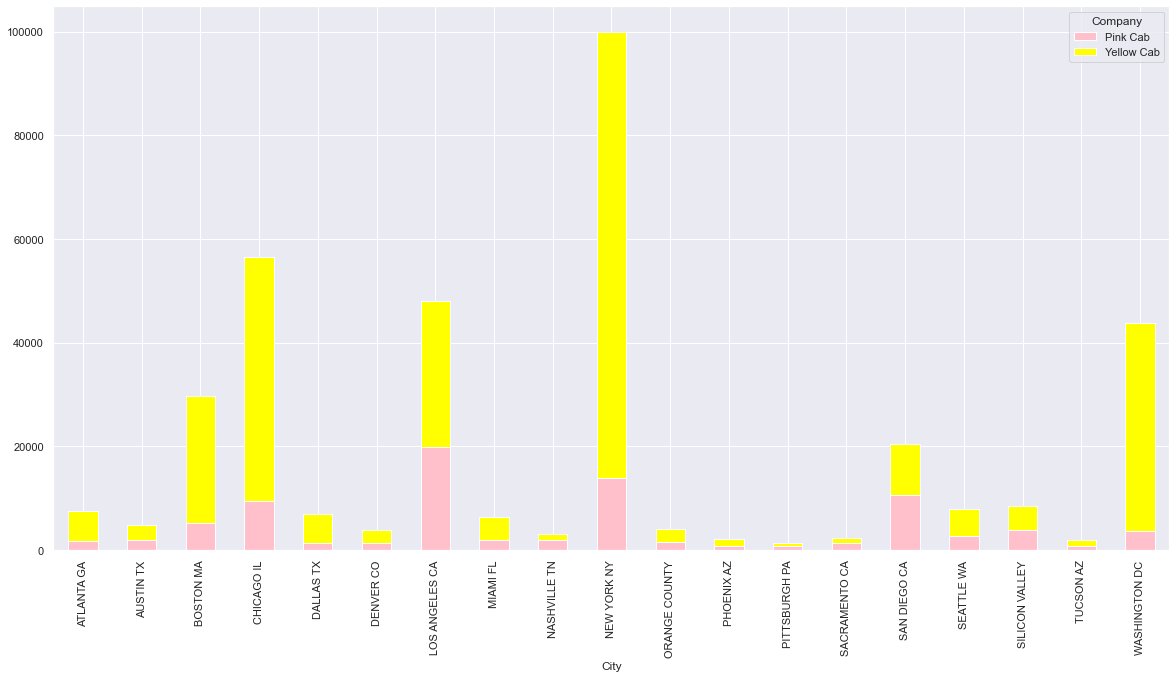

In [31]:
#Now let us see the cab population for both companies for each city
plt.figure(figsize=(10,9))
citysum=masterdata.groupby(by=['City', 'Company']).count()['Users'].unstack("Company")
citysum.plot(kind="bar", figsize=(20,10), color=["pink","yellow"], stacked=True)

New York City has the highest overall number Yellow Cab users, but Los Angeles has the highest number of Pink Cab users.

## Profit Analysis:

In [168]:
#Add a new column to dataset to calculate the margin between 'Price_Charged' and 'Cost_of_Trip' and call it 'Profit'
company = masterdata.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

masterdata.head(5)

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,Day,Profit
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2416.0,Male,28.0,21399.0,Cash,2016.0,1.0,8.0,44.765
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,2060.0,Male,18.0,8149.0,Card,2016.0,1.0,9.0,151.680
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,1451.0,Male,35.0,23989.0,Card,2016.0,1.0,6.0,50.362
3,NEW YORK NY,8405837.0,302149.0,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,1609.0,Male,30.0,23036.0,Card,2016.0,1.0,4.0,50.422
4,NEW YORK NY,8405837.0,302149.0,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2927.0,Male,33.0,14520.0,Cash,2016.0,1.0,9.0,84.110


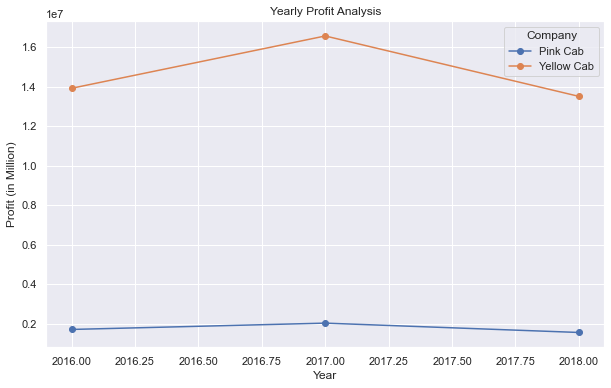

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
masterdata.groupby(['Year', 'Company']).sum()['Profit'].unstack().plot(ax=ax, title='Yearly Profit Analysis', ylabel='Profit (in Million)', marker='o');

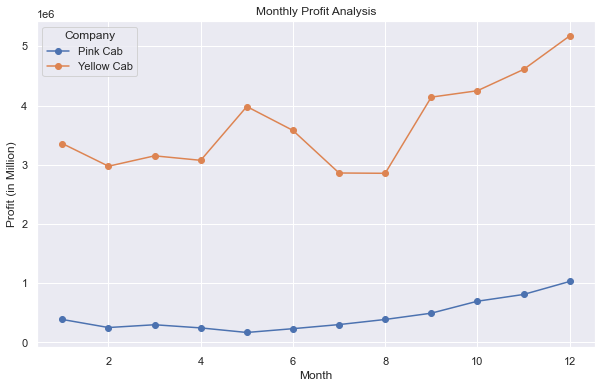

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
masterdata.groupby(['Month', 'Company']).sum()['Profit'].unstack().plot(ax=ax, title='Monthly Profit Analysis', ylabel='Profit (in Million)', marker='o');

In [78]:
round(masterdata.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)


,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


Yellow Cab company's profits are eight times higher than Pink Cab Company's profits



## Age:

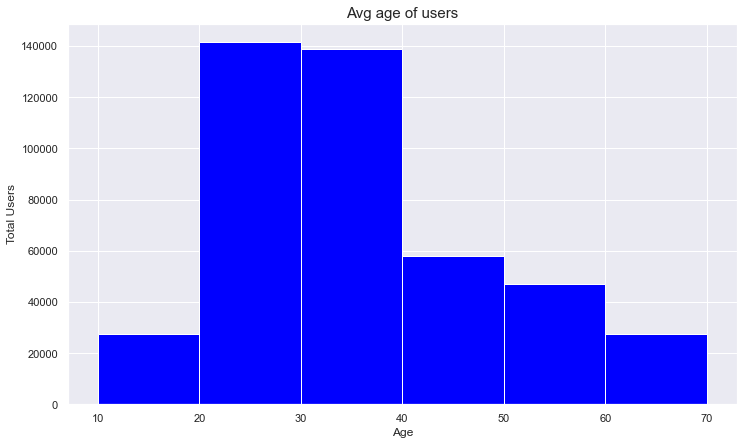

In [134]:
plt.figure(figsize=(12,7))
plt.title('Avg age of users', fontsize=15)
plt.hist(masterdata.Age, bins=np.arange(10, 75, 10), color='blue');
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Users', fontsize=12)
plt.show()


Most of the Cab users for both companies are aged between 20 and 40 years old.

## KM Travelled VS. Price Charged

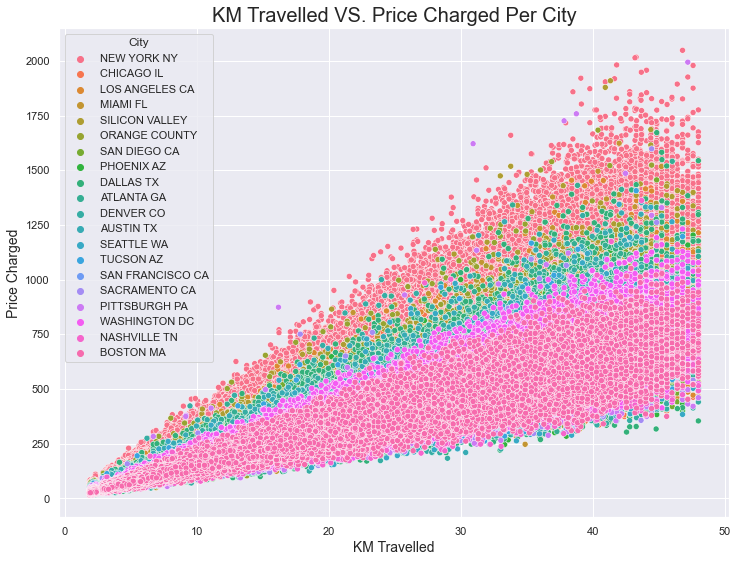

In [91]:
plt.figure(figsize = (12, 9))
sns.scatterplot(data=masterdata, x="KM Travelled", y='Price Charged', hue='City')
plt.title('KM Travelled VS. Price Charged Per City',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()


New York cab has the highest charges as KM travelled increases, and outliers exist in both cab companies which could be due to causes such as weather.

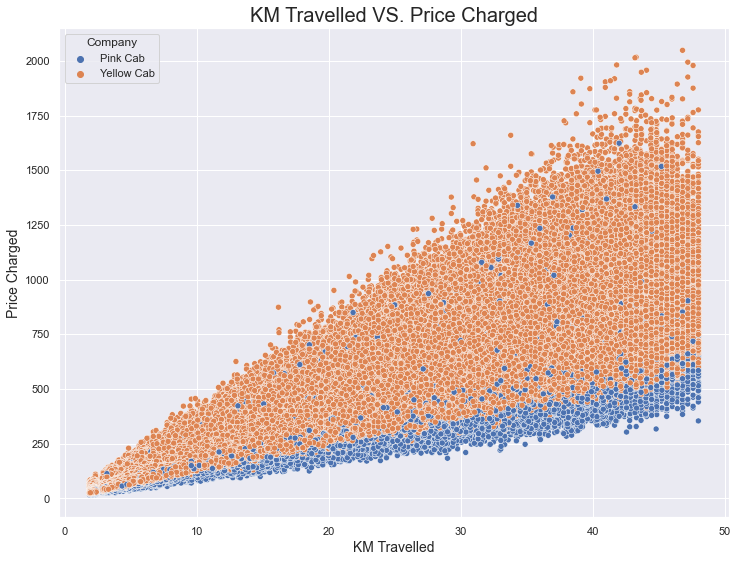

In [92]:
plt.figure(figsize = (12, 9))
sns.scatterplot(data=masterdata, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('KM Travelled VS. Price Charged',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()


There is a linear relationship between KM traveled and Price Charged, and Yellow Cab has higher charges over distance travelled. There is a positive correlation in the graph for both Pink and Yellow Cab.


## Hypothesis:

### Hypothesis 1: 

In [93]:
#Pink Cab
x = masterdata[(masterdata['Payment_Mode']=='Cash')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = masterdata[(masterdata['Payment_Mode']=='Card')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [97]:
#Yellow Cab
x = masterdata[(masterdata['Payment_Mode']=='Cash')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = masterdata[(masterdata['Payment_Mode']=='Card')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab


From testing the hypothesis regarding Payment_Mode for both cab companies, we see that there is no difference in payment mode whether it was cash or card, for both companies.

### Hypothesis 3:

In [95]:
#Pink Cab
a = masterdata[(masterdata.Gender=='Male')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Gender=='Female')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('P value is ', p_value)
if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.115153059004258
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [96]:
#Yellow Cab
a = masterdata[(masterdata.Gender=='Male')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Gender=='Female')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('P value is ', p_value)
if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


From testing the hypothesis regarding Gender for both cab companies, we see that there is no difference in profit regarding gender for the Pink Cab, but there is a difference in profit regarding gender for the Yellow Cab.

### Hypothesis 3:

In [98]:
#Pink Cab
a = masterdata[(masterdata.Age <= 50)&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Age >= 50)&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

71228 14405
P value is  0.3905344473325604
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [99]:
#Yellow Cab
a = masterdata[(masterdata.Age <= 50)&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Age >= 50)&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

231480 46368
P value is  3.893841736668538e-05
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


From testing the hypothesis regarding Gender for both cab companies, we see that there is no difference in profits generated regarding age for the Pink Cab, but there is a difference for the Yellow Cab, due to the discounts they offer for customers who are older than 50 years old.

## Conclusion and Recommendation: